In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps

from config import (api_key, g_key)

# Configure gmaps
gmaps.configure(api_key=g_key)

In [2]:
# Read the airports.csv and display dataframe
airports_df = pd.read_csv('airports.csv')
airports_df.head()

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228


In [3]:
# Rename columns to prepare dataframe for merge
airports_df.rename(columns={"CITY":"City", "IATA":"Code", "AIRPORT":"Airport", "STATE":"State"}, inplace=True)
airports_df.head()

,Code,Airport,City,State,COUNTRY,LATITUDE,LONGITUDE
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228


In [4]:
# Read the airport_ratings_passengers.csv and display dataframe
airport_ratings_df = pd.read_csv('airport_ratings_passengers1.csv')
airport_ratings_df.head()

,Unnamed: 0,Airport,Code,Originating Domestic Passengers 10%,Originating Domestic Passengers
0,1,"Los Angeles, CA: Los Angeles International",LAX,"1,564,494",15644940
1,2,"Chicago, IL: Chicago O'Hare International",ORD,"1,266,224",12662240
2,3,"Denver, CO: Denver International",DEN,"1,241,394",12413940
3,4,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",ATL,"1,128,009",11280090
4,5,"Boston, MA: Logan International",BOS,"1,043,353",10433530


In [5]:
# Merge airports_df with airport_ratings_df by "Code"
merged_df=pd.merge(airports_df, airport_ratings_df, on="Code", how="left")
merged_df.head()

,Code,Airport_x,City,State,COUNTRY,LATITUDE,LONGITUDE,Unnamed: 0,Airport_y,Originating Domestic Passengers 10%,Originating Domestic Passengers
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194,59.0,"Albuquerque, NM: Albuquerque International Sun...","151,543",1515430.0
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186,65.0,"Anchorage, AK: Ted Stevens Anchorage Internati...","123,486",1234860.0
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,4.0,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...","1,128,009",11280090.0
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872,25.0,"Austin, TX: Austin - Bergstrom International","488,498",4884980.0
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228,49.0,"Hartford, CT: Bradley International","232,144",2321440.0


In [6]:
# Drop the columns that will not use
merged_df.drop(columns=["Unnamed: 0", "Originating Domestic Passengers 10%", "COUNTRY", "Airport_y"], inplace=True)
merged_df.head()

,Code,Airport_x,City,State,LATITUDE,LONGITUDE,Originating Domestic Passengers
0,ABQ,Albuquerque International,Albuquerque,NM,35.040222,-106.609194,1515430.0
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,61.174320,-149.996186,1234860.0
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,33.640444,-84.426944,11280090.0
3,AUS,Austin-Bergstrom International,Austin,TX,30.194533,-97.669872,4884980.0
4,BDL,Bradley International,Windsor Locks,CT,41.938874,-72.683228,2321440.0


In [13]:
# Rename the columns of merged_df to have clear headers
merged_df.rename(columns={"Airport_x": "Airport Name", 
                          "LATITUDE":"Lat", 
                          "LONGITUDE":"Lng", 
                          "Originating Domestic Passengers":"Passengers"}, inplace=True)
# merged_df.dropna(how='any')
# merged_df.fillna(value='None',inplace=True)
merged_df

,Code,Airport Name,City,State,Lat,Lng,Passengers
0,ABQ,Albuquerque International,Albuquerque,NM,35.040222,-106.609194,1.51543e+06
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,61.174320,-149.996186,1.23486e+06
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,33.640444,-84.426944,1.12801e+07
3,AUS,Austin-Bergstrom International,Austin,TX,30.194533,-97.669872,4.88498e+06
4,BDL,Bradley International,Windsor Locks,CT,41.938874,-72.683228,2.32144e+06
...,...,...,...,...,...,...,...
336,WRG,Wrangell,Wrangell,AK,56.484326,-132.369824,9570
337,WYS,Yellowstone,West Yellowstone,MT,44.688399,-111.117638,3060
338,XNA,Northwest Arkansas Regional,Fayetteville Springdale Rogers,AR,36.281869,-94.306811,506440
339,YAK,Yakutat,Yakutat,AK,59.503361,-139.660226,5250


In [21]:
pssgr = merged_df["Passengers"].replace(',','')
# merged_df = merged_df.Passengers.astype(int)
pd.to_numeric(pssgr, errors="coerce")
merged_df["Passengers"] = pd.to_numeric(pssgr, errors="coerce")

In [24]:
# Create a new dataframe for those airports who have 2,000,000 passengers or more
passengers_over_2mill = merged_df.loc[(merged_df["Passengers"] >= 2000000)]


# Set the index of this new dataframe to be the airports names
passengers_over_2mill = passengers_over_2mill.set_index("Airport Name")

passengers_over_2mill

,Code,City,State,Lat,Lng,Passengers
Airport Name,,,,,,
William B Hartsfield-Atlanta Intl,ATL,Atlanta,GA,33.640444,-84.426944,11280090.0
Austin-Bergstrom International,AUS,Austin,TX,30.194533,-97.669872,4884980.0
Bradley International,BDL,Windsor Locks,CT,41.938874,-72.683228,2321440.0
Nashville International,BNA,Nashville,TN,36.124477,-86.678182,4138330.0
Gen Edw L Logan Intl,BOS,Boston,MA,42.364348,-71.005179,10433530.0
Baltimore-Washington International,BWI,Baltimore,MD,39.175402,-76.668198,6280880.0
Cleveland-Hopkins Intl,CLE,Cleveland,OH,41.410894,-81.849397,3187120.0
Charlotte Douglas International,CLT,Charlotte,NC,35.214011,-80.943126,4396580.0
Port Columbus Intl,CMH,Columbus,OH,39.997985,-82.891883,2628740.0


In [25]:
# Set x axis and tick locations
x_axis = np.arange(len(passengers_over_2mill))
tick_locations = [value+0.4 for value in x_axis]

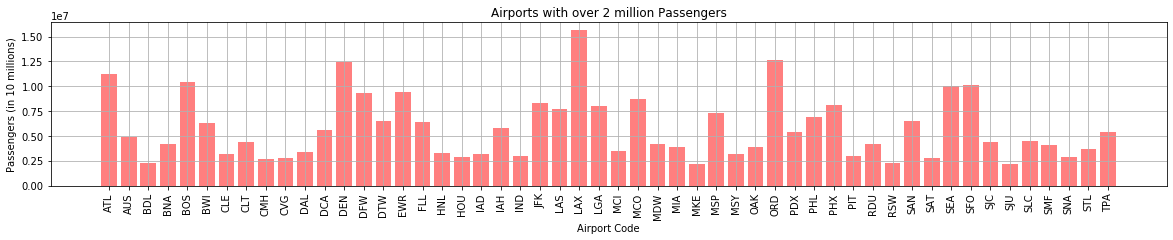

In [31]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, passengers_over_2mill["Passengers"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, passengers_over_2mill["Code"], rotation="vertical")
plt.title("Airports with over 2 million Passengers")
plt.xlabel("Airport Code")
plt.ylabel("Passengers (in 10 millions)")
plt.grid()
plt.show()

In [45]:
# Create Passengers and Codes column into a list
pass_num = passengers_over_2mill["Passengers"].tolist()
airport_codes = passengers_over_2mill["Code"].tolist()

In [55]:
airports_dict = passengers_over_2mill.reset_index().to_dict('records')
airports_dict

[{'Airport Name': 'William B Hartsfield-Atlanta Intl',
  'Code': 'ATL',
  'City': 'Atlanta',
  'State': 'GA',
  'Lat': 33.64044444,
  'Lng': -84.42694444,
  'Passengers': 11280090.0},
 {'Airport Name': 'Austin-Bergstrom International',
  'Code': 'AUS',
  'City': 'Austin',
  'State': 'TX',
  'Lat': 30.19453278,
  'Lng': -97.66987194,
  'Passengers': 4884980.0},
 {'Airport Name': 'Bradley International',
  'Code': 'BDL',
  'City': 'Windsor Locks',
  'State': 'CT',
  'Lat': 41.93887417,
  'Lng': -72.68322833,
  'Passengers': 2321440.0},
 {'Airport Name': 'Nashville International',
  'Code': 'BNA',
  'City': 'Nashville',
  'State': 'TN',
  'Lat': 36.12447667,
  'Lng': -86.67818222,
  'Passengers': 4138330.0},
 {'Airport Name': 'Gen Edw L Logan Intl',
  'Code': 'BOS',
  'City': 'Boston',
  'State': 'MA',
  'Lat': 42.3643475,
  'Lng': -71.00517917,
  'Passengers': 10433530.0},
 {'Airport Name': 'Baltimore-Washington International',
  'Code': 'BWI',
  'City': 'Baltimore',
  'State': 'MD',
  '

In [59]:
# Create a map using state centroid coordinates to set markers
marker_locations = passengers_over_2mill[['Lat', 'Lng']]
amount_passengers = passengers_over_2mill["Passengers"]
airport_by_code = [passengers_over_2mill['Code'] for code in airport_codes]
info_box_template = """
<dl>
<dt>Name</dt><dd>{Code}</dd>
<dt>Number of passengers</dt><dd>{Passengers}</dd>
</dl>
"""

# Create a marker_layer using the poverty list to fill the info box
fig = gmaps.figure()

# markers = gmaps.marker_layer(marker_locations,
#     info_box_content=[f"Passengers: {num}" for num in pass_num])
airport_info = [info_box_template.format(**code) for code in airports_dict]

marker_layer = gmaps.marker_layer(marker_locations, info_box_content=airport_info)
fig.add_layer(marker_layer)
# fig.add_layer(markers)
# Create heat layer
heat_layer = gmaps.heatmap_layer(marker_locations, weights=amount_passengers, dissipating=False, point_radius=2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))